In [1]:
import glob
import pickle
import numpy as np
from music21 import converter, instrument, note, chord
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [2]:
def get_notes():
    """ Get all the notes and chords from the midi files in the ./midi_songs directory """
    notes = []

    for file in glob.glob("midi_songs/*.mid"):
        midi = converter.parse(file)

        print("Parsing %s" % file)
        notes_to_parse = midi.flat.notes

        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))

    with open('data/notes', 'wb') as filepath:
        pickle.dump(notes, filepath)

    return notes

notes=get_notes()

Parsing midi_songs/mz_570_1.mid
Parsing midi_songs/mz_570_2.mid
Parsing midi_songs/mz_570_3.mid
Parsing midi_songs/mz_545_1.mid
Parsing midi_songs/mz_332_3.mid
Parsing midi_songs/mz_330_1.mid
Parsing midi_songs/mz_332_2.mid
Parsing midi_songs/mz_545_2.mid
Parsing midi_songs/mz_330_2.mid
Parsing midi_songs/mz_330_3.mid
Parsing midi_songs/mz_332_1.mid
Parsing midi_songs/mz_545_3.mid
Parsing midi_songs/mz_331_2.mid
Parsing midi_songs/mz_333_1.mid
Parsing midi_songs/mz_331_3.mid
Parsing midi_songs/mz_331_1.mid
Parsing midi_songs/mz_333_3.mid
Parsing midi_songs/mz_333_2.mid
Parsing midi_songs/mz_311_1.mid
Parsing midi_songs/mz_311_2.mid
Parsing midi_songs/mz_311_3.mid


In [3]:
notes[:10]

['B-4', 'B-3', 'F4', 'F3', 'D4', 'D3', 'F4', 'F3', 'B-4', 'B-3']

In [4]:
class_id=np.unique(notes)
len(class_id)

197

In [5]:
class_num=[]
count=0
for id in class_id:
    for j in range(len(notes)):
        if notes[j]==id:
            count+=1
    class_num.append(count)
    count=0

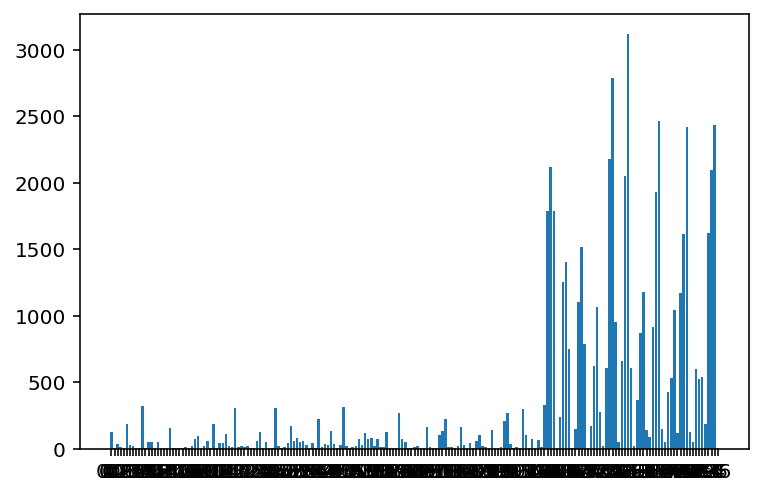

<Figure size 2160x864 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

plt.bar(class_id,class_num)
plt.figure(figsize=(30,12))
plt.show()